In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.shape

(200, 6)

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [9]:
# label encoding for this categorical data
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

In [10]:
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [12]:
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0,0,1.286522,4
1,0.162699,1,1,0,-0.415145,2
2,0.162699,1,1,0,-0.828558,2
3,-0.988614,0,2,0,-1.149963,3
4,1.011034,0,1,0,0.271794,4


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [15]:
dt_model = DecisionTreeClassifier(random_state=42)

In [16]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
dt_predictions = dt_model.predict(X_test)

In [18]:
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dt_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree Model Evaluation:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40




Confusion Matrix:


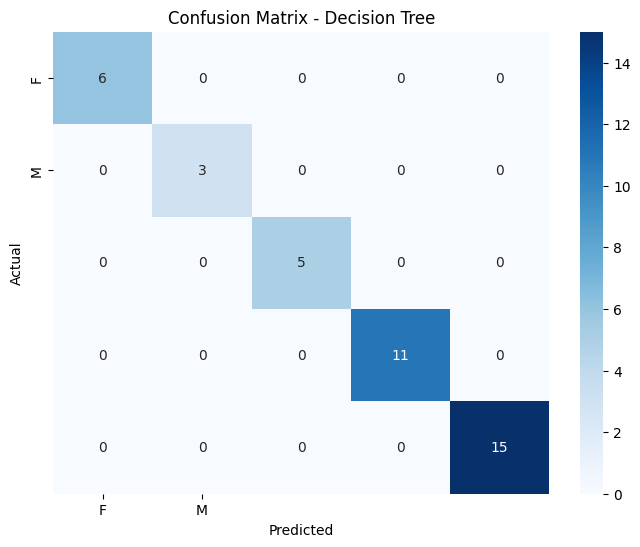

In [19]:
print("\nConfusion Matrix:")
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_sex.classes_, yticklabels=le_sex.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [20]:
dt_cv_scores = cross_val_score(dt_model, df, y, cv=5)
print(f"\nDecision Tree 5-Fold Cross-Validation Scores: {dt_cv_scores}")
print(f"Mean CV Score: {dt_cv_scores.mean():.4f}")


Decision Tree 5-Fold Cross-Validation Scores: [1.    1.    1.    0.975 1.   ]
Mean CV Score: 0.9950


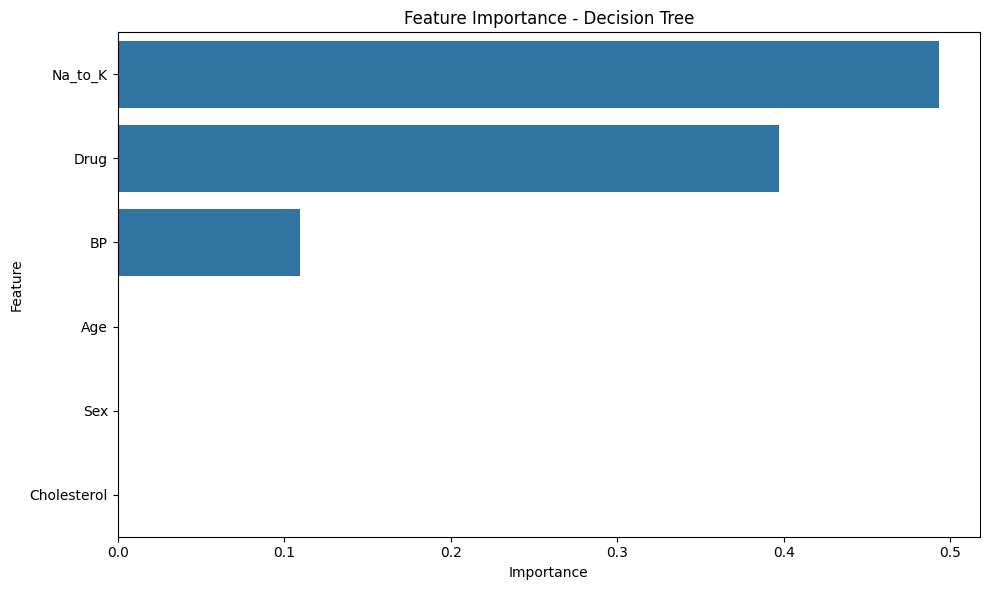

In [21]:
dt_feature_importance = pd.DataFrame({
    'Feature': df.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance)
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [23]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [24]:
ccp_alphas = ccp_alphas[:-1]

In [25]:
pruned_trees = []
train_scores = []
val_scores = []

In [26]:
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    
    # Track the models and scores
    pruned_trees.append(dt)
    train_scores.append(dt.score(X_train, y_train))
    val_scores.append(dt.score(X_test, y_test))

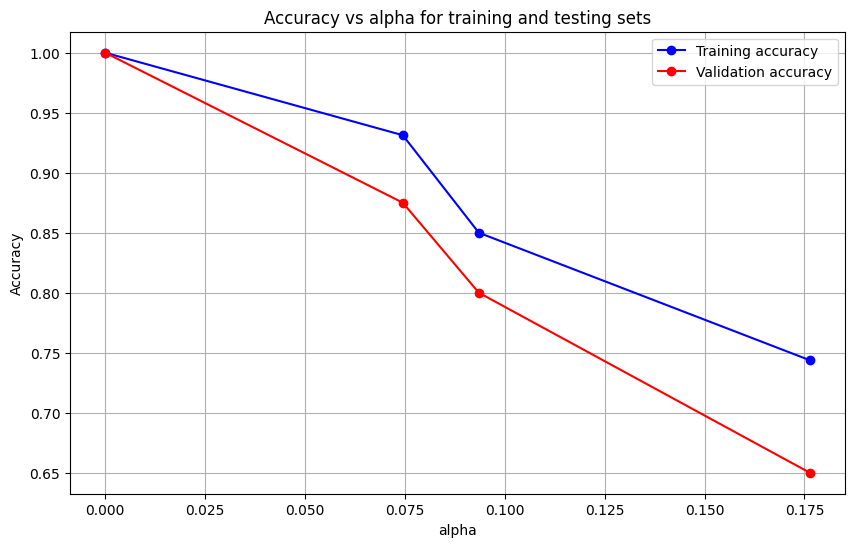

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, 'b-', marker='o', label='Training accuracy')
plt.plot(ccp_alphas, val_scores, 'r-', marker='o', label='Validation accuracy')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs alpha for training and testing sets')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Convert to DataFrame for easier handling
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

In [29]:
ideal_alpha = alpha_results.loc[alpha_results['mean_accuracy'].idxmax()]['alpha']
print(f"\nOptimal alpha value: {ideal_alpha:.6f}")


Optimal alpha value: 0.000000


In [30]:
pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_alpha)
pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=42)

In [31]:
pruned_predictions = pruned_dt.predict(X_test)
pruned_accuracy = accuracy_score(y_test, pruned_predictions)

In [32]:
print("\nPruned Decision Tree Evaluation:")
print(f"Accuracy: {pruned_accuracy:.4f}")
print(f"Number of nodes in original tree: {dt_model.tree_.node_count}")
print(f"Number of nodes in pruned tree: {pruned_dt.tree_.node_count}")
print(f"Reduction in tree size: {(1 - pruned_dt.tree_.node_count/dt_model.tree_.node_count)*100:.1f}%")

print("\nClassification Report for Pruned Tree:")
print(classification_report(y_test, pruned_predictions))


Pruned Decision Tree Evaluation:
Accuracy: 1.0000
Number of nodes in original tree: 9
Number of nodes in pruned tree: 9
Reduction in tree size: 0.0%

Classification Report for Pruned Tree:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# Random Forest

In [45]:
rf_model = RandomForestClassifier(n_estimators=2, random_state=42)

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [47]:
rf_predictions = rf_model.predict(X_test)

In [48]:
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Model Evaluation:
Accuracy: 0.9500

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       0.83      1.00      0.91         5
       drugX       0.91      0.91      0.91        11
       drugY       1.00      0.93      0.97        15

    accuracy                           0.95        40
   macro avg       0.95      0.97      0.96        40
weighted avg       0.95      0.95      0.95        40

